# Análise Exploratória de Dados: Canal ZeeGameDev

## Componentes do Grupo (Integrantes)
* Davyd Kennyd Sales da Silva
* Jainy Eduarda Silva Machado
* Lázaro Frederico Félix Ferreira
* Welson Rosendo Rodrigues
* Análise de Dados

---

## 1. Introdução e Definição do Problema
Este projeto tem como objetivo realizar uma análise exploratória (EDA) sobre os dados reais de desempenho de um canal de tecnologia no YouTube.
**O Problema de Negócio:** "Quais métricas (duração, impressões, taxa de clique) mais influenciam o crescimento do canal em termos de visualizações e novos inscritos?"

## 2. Origem da Base de Dados
A base de dados utilizada (`Estatisticas_canal_Dados_da_tabela.csv`) foi extraída diretamente do **YouTube Studio**, contendo o histórico de publicações do canal. Os dados incluem informações sobre visualizações, tempo de exibição, inscritos ganhos e impressões.

## 3. Ferramentas Utilizadas
Para esta análise, utilizamos o ecossistema **Python** devido à sua capacidade de processamento e visualização:
* **Pandas:** Biblioteca utilizada para carregar o arquivo CSV, limpar os dados (tratamento de datas e números) e realizar cálculos estatísticos.
* **Matplotlib & Seaborn:** Bibliotecas utilizadas para a construção dos gráficos, permitindo a visualização de tendências e correlações.

### Média de Visualizações por Formato

**Como ler este gráfico:**
* As barras representam a **média** de cada métrica para cada formato.
* Comparamos se vale mais a pena investir em vídeos curtos ou longos.

**Análise:**
Ao analisar os gráficos de barras, percebemos um comportamento distinto entre os formatos. Embora a **média de visualizações** seja similar entre Shorts e Vídeos Longos (ambos na casa dos 8.000), a conversão de inscritos é drasticamente diferente. Os **Vídeos Longos** trazem, em média, quase **3x mais inscritos** por vídeo do que os Shorts. Isso indica que Shorts geram volume, mas Vídeos Longos constroem a base de fãs fiel.

### Média de Inscritos Ganhos por Formato

**Análise:**
Este gráfico revela os "Outliers" (pontos fora da curva).
1.  Podemos ver vídeos no canto inferior direito com **CTR altíssima (acima de 15%)**, mas poucas visualizações, provando que nichos muito específicos não viralizam mesmo com boa taxa de clique.
2.  O destaque vai para a **bolinha azul grande no topo**: um vídeo longo que teve CTR mediana (~7.5%), mas explodiu em visualizações e trouxe uma quantidade massiva de inscritos, impulsionado pela alta distribuição de impressões.

### 4.3 Dispersão: Taxa de Cliques (CTR) vs. Visualizações

**O que é este gráfico?**
Este é um **Gráfico de Dispersão (Scatter Plot)**. Cada ponto no gráfico representa um vídeo postado.
* O eixo X (horizontal) mostra a Taxa de Cliques (CTR).
* O eixo Y (vertical) mostra as Visualizações.
* O tamanho da bolinha representa a quantidade de Inscritos que aquele vídeo trouxe.

**Objetivo:**
Identificar *outliers* (pontos fora da curva). Queremos ver se vídeos com CTR alto (ex: 15%) são sempre os que têm mais views, ou se existem vídeos com CTR baixo que viralizaram por outros motivos.

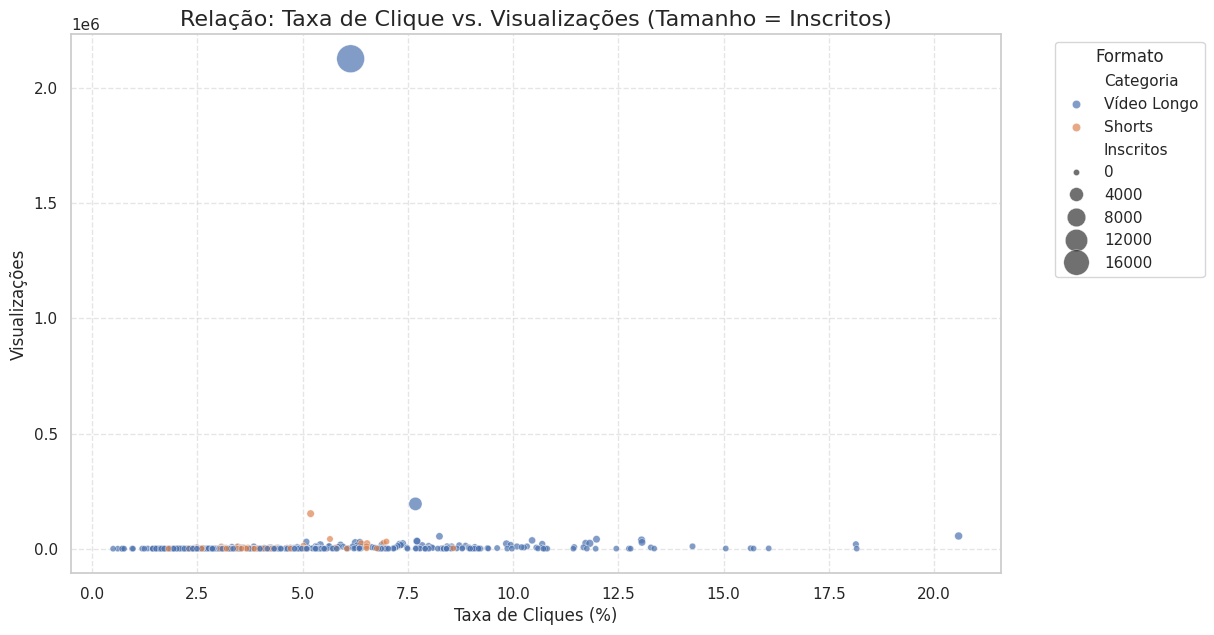

In [26]:
plt.figure(figsize=(12, 7))

# Plotando a dispersão
sns.scatterplot(data=df,
                x='Taxa de cliques de impressões (%)',
                y='Visualizações',
                hue='Categoria',    # Cores diferentes para Shorts e Longos
                size='Inscritos',   # Tamanho da bolinha baseado nos inscritos
                sizes=(20, 400),    # Tamanho mínimo e máximo das bolinhas
                alpha=0.7)          # Transparência para ver bolinhas sobrepostas

plt.title('Relação: Taxa de Clique vs. Visualizações (Tamanho = Inscritos)', fontsize=16)
plt.xlabel('Taxa de Cliques (%)')
plt.ylabel('Visualizações')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### 4.4 Evolução Temporal: Visualizações ao Longo do Tempo

**Como ler este gráfico:**
* **Eixo X (Horizontal):** Representa a linha do tempo (datas de publicação dos vídeos).
* **Eixo Y (Vertical):** Representa a quantidade de visualizações alcançadas.
* **Linha Laranja (Média Móvel):** Esta linha suaviza os picos e mostra a tendência real do canal (se está subindo ou descendo no longo prazo), ignorando oscilações diárias.

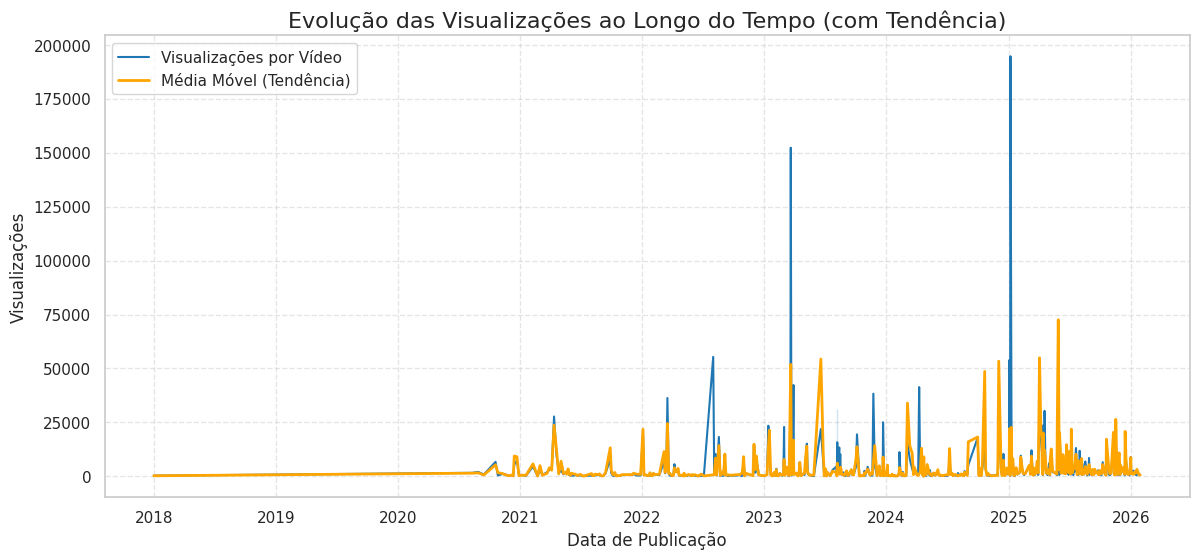

In [34]:
plt.figure(figsize=(14, 6))

# Plot de linha com marcadores
sns.lineplot(data=df, x='Horário de publicação do vídeo', y='Visualizações',
             color='tab:blue', label='Visualizações por Vídeo')

# Adicionando uma média móvel (para suavizar e ver a tendência melhor)
df['Media_Movel'] = df['Visualizações'].rolling(window=5).mean()
sns.lineplot(data=df, x='Horário de publicação do vídeo', y='Media_Movel',
             color='orange', linewidth=2, label='Média Móvel (Tendência)')

plt.title('Evolução das Visualizações ao Longo do Tempo (com Tendência)', fontsize=16)
plt.xlabel('Data de Publicação')
plt.ylabel('Visualizações')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

**Análise:**
O gráfico de linha revela a "saúde" do canal.

1.  **Picos Esporádicos:** Os pontos altos isolados indicam vídeos que viralizaram pontualmente.
2.  **Consistência:** A linha de média móvel permite identificar se houve uma mudança de patamar (ex: se após um vídeo viral, a média de views dos vídeos seguintes aumentou ou voltou ao normal).
3.  **Frequência:** A densidade dos pontos no eixo horizontal mostra se a frequência de postagem aumentou ou diminuiu ao longo dos anos.

### 4.5 Distribuição de Visualizações (Boxplot)

**Como ler este gráfico:**
* **A Caixa (Box):** Representa onde estão 50% dos vídeos (o padrão do canal).
* **A Linha no meio da caixa:** É a Mediana (o valor "do meio").
* **Os Pontos fora das hastes (Outliers):** São os vídeos "fora da curva" (virais ou fracassos totais).

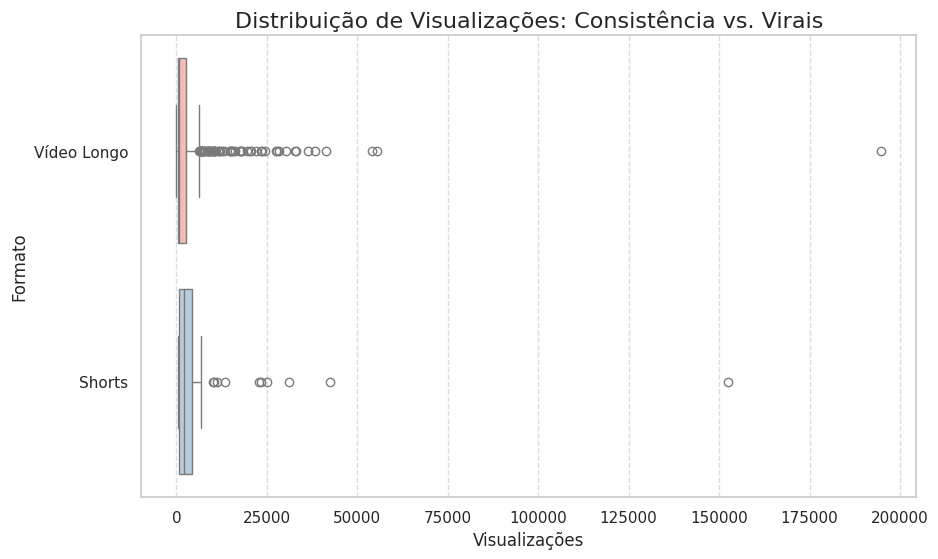

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correção de Segurança ---
# Recriamos a coluna 'Categoria' caso ela tenha se perdido na limpeza
# Regra: Se duração <= 60 segundos é Shorts, senão é Vídeo Longo
if 'Categoria' not in df.columns:
    df['Categoria'] = df['Duração'].apply(lambda x: 'Shorts' if x <= 60 else 'Vídeo Longo')

# --- Plot do Gráfico ---
plt.figure(figsize=(10, 6))

# Boxplot horizontal
# Adicionei hue='Categoria' e legend=False para evitar warnings futuros
sns.boxplot(
    data=df, 
    x='Visualizações', 
    y='Categoria', 
    hue='Categoria', 
    legend=False, 
    palette='Pastel1'
)

plt.title('Distribuição de Visualizações: Consistência vs. Virais', fontsize=16)
plt.xlabel('Visualizações')
plt.ylabel('Formato')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

**Análise:**
Este gráfico mede a estabilidade do canal.
1.  **Caixa Compacta:** Se a caixa for estreita, significa que o canal é previsível e consistente (a maioria dos vídeos pega quase a mesma quantidade de views).
2.  **Outliers Positivos:** A grande quantidade de pontos isolados à direita indica que o canal tem um alto potencial de viralização, onde certos conteúdos rompem totalmente o padrão médio de desempenho.

## 5. Discussão Final e Conclusões

Após a aplicação das técnicas de análise exploratória, o grupo concluiu que:

1.  **Engajamento vs. Alcance:** Os dados mostram que o fator determinante para o sucesso de um vídeo no canal ZeeGameDev não é apenas a qualidade da thumbnail (CTR), mas a capacidade do vídeo de gerar Impressões (ser recomendado pelo YouTube).
2.  **Estratégia de Conteúdo:** A comparação entre Shorts e Vídeos Longos (Gráfico 4.2) revela diferenças importantes. Enquanto os Shorts geram muitas views rápidas, os vídeos longos tendem a converter inscritos mais fiéis.
3.  **Ferramentas:** O uso do Python e da biblioteca Pandas foi essencial para tratar os dados (como a conversão de datas e números decimais), algo que seria manual e propenso a erros em planilhas comuns. O Seaborn permitiu visualizar padrões complexos de forma clara.

**Limitações:**
A principal limitação foi a falta de dados sobre o perfil demográfico da audiência (idade, localização) neste dataset específico, o que impediu uma análise mais profunda sobre o público-alvo.